In [1]:
from obspy import read, read_inventory, UTCDateTime
from obspy.geodetics import locations2degrees
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

%matplotlib inline

In [2]:
from rtergpy.run import defaults,event
from rtergpy.waveforms import theorPinfo,getwaves

Defaults=defaults()
Event=event()
Defaults.src="RASPISHAKE"
Defaults.network='AM'
Defaults.chan="EHZ"
Defaults.stationrange=[25,30]
station='SF4A5'

Event.origin=[[-14.8628,-70.3081,217.83],UTCDateTime(2022,5,26,12,2,20)]
print(Defaults.waveparams)
%matplotlib inline

[[[0.00333333, 2.0], [0.5, 2.0]], [-60, 300], 1]


In [3]:
std,df=getwaves(Defaults=Defaults,Event=Event)

New working directory is:  /home/ljaffe7/Rtergpy/rterg_events/events/2022/2021092900/00
Checking for stations available within range from IRIS
Getting waves from RASPISHAKE


 18%|███████▊                                    | 3/17 [00:02<00:09,  1.54it/s]

AM.R325B.00.EHZ failed to download. Continuing..


100%|███████████████████████████████████████████| 17/17 [00:13<00:00,  1.25it/s]

writing  /home/ljaffe7/Rtergpy/rterg_events/events/2022/2021092900/00/pkls/Params_2021092900.pkl 
 /home/ljaffe7/Rtergpy/rterg_events/events/2022/2021092900/00/Params_2021092900.csv
writing  /home/ljaffe7/Rtergpy/rterg_events/events/2022/2021092900/00/pkls/Wavestream-raw_2021092900.pkl


In [4]:
#modifying for a raspberry shake 
#time1&time2 need to be in the form(year,month,day,hour,min,sec)
def signal2noiseRS(tr, rPtime=60, window=10,**kwargs):
    #rPtime is relative time of P arrival to the beginning of the window [s]
    #window is size of window for calculating the pre-P noise and post P [s]  
    sps=int(tr.stats.sampling_rate)
    vel=tr.data   
    vel_square = np.square(vel)
    #plt.figure()
    #plt.plot(vel_square)
    #plt.ylabel('vel (m/s)^2')
    
    if window < rPtime:
        #noise before event 
        swin=int((rPtime/2-window/2)*sps-1)      
        ewin=int(swin+window*sps-1)
        noise = np.mean(vel_square[swin:ewin])      #based on RS sampling rate (another if statement for IRIS data sampling rates?)
        #print(noise)

        #signal after the pwave arrives
        pwin=int(rPtime*sps-1)
        epwin=int(pwin+window*sps-1)
        signal = np.mean(vel_square[pwin:epwin])     #based on RS sampling rate 
        #print(signal)

        ratio = signal/noise
        #print(ratio)
        return(ratio)  
    else :
        print("WARNING:  window ",window," is greater than rPtime", rPtime, "returning 0.")
        return 0
    
    
#signal2noiseRS(tr,rPtime=60,window=30)

In [5]:
# test routine on one of the signals
tr=std[6].copy() #changed st to std 
tr.resample(10) # resample to 10sps independent of input sps
print(tr.stats.sampling_rate)
tr.plot()
#tr.stats

pre_filt = (0.1, 0.5, 5.0, 10.0) #sample rate is 100
tr.remove_response(output = 'VEL', pre_filt = pre_filt)

# may remove
tr.detrend('demean')           # preprocess data
tr.detrend('linear')
tr.detrend('demean')           # preprocess data
tr.plot();
signal2noiseRS(tr,rPtime=60,window=30)

10.0


96230.90162657389

In [6]:
pre_filt = (0.1, 0.5, 5.0, 10.0) #sample rate is 20
snr=np.zeros(0)
dist=np.zeros(0)
for tr in std.copy():
    tr.resample(10) # resample to 10sps independent of input sps
    #print(tr.stats.sampling_rate)
    tr.remove_response(output = 'VEL', pre_filt = pre_filt)
    # may remove
    tr.detrend('demean')           # preprocess data
    tr.detrend('linear')
    tr.detrend('demean')           # preprocess data
    snr=np.append(snr,signal2noiseRS(tr,rPtime=60,window=30))
    # grab distance info
    dist=np.append(dist,tr.stats.distdeg)

In [7]:
print(snr)

[7.05082848e+03 4.22297740e+04 9.77484605e+03 4.99539496e+03
 6.43071691e+04 4.13599306e+04 9.62309016e+04 1.54758168e+03
 3.94890277e+04 2.78829477e+04 6.64842783e+03 1.95209695e+04
 1.88316424e+04 4.23550740e+04 4.08173841e+04 2.38621847e+00]


Text(0, 0.5, 'signal to noise ratio')

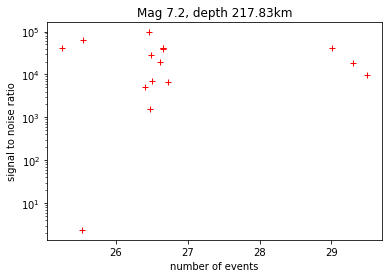

In [13]:
%matplotlib inline
#plt.semilogy(snr,'r.')
plt.semilogy(dist, snr,'r+')
plt.title('Mag 7.2, depth 217.83km')
plt.xlabel('number of events')
plt.ylabel('signal to noise ratio')
plt.show()

In [ ]:
print(array)

In [ ]:
st[0][10].stats.sampling_rate

In [ ]:
std[0].plot()

# OLD Below

In [ ]:
#print(st[0][5].stats)
tr=std[6].copy() #changed st to std 
pre_filt = (0.1, 0.5, 5.0, 10.0) #sample rate is 100

#print(tr.stats.sampling_rate)

tr.resample(10) # resample to 10sps independent of input sps
print(tr.stats.sampling_rate)
tr.plot()
tr.stats

tr.remove_response(output = 'VEL', pre_filt = pre_filt)

# may remove
tr.detrend('demean')           # preprocess data
tr.detrend('linear')
tr.detrend('demean')           # preprocess data
    
tr.plot()

#tr.decimate(10, strict_length=False,no_filter=True)